### Лабораторна робота #4, Людомирський Юрій, КА-96, v23
#### Загальна постановка задачі.
1. Взяти данi з роботи № 2 за варiантом. 2D-данi представити графiчно.
---
2. Розбити данi на навчальний, перевiрочний та тестовий набори. Перевiрочний набiр використати для налаштування гiперпараметрiв. Тестовий набiр використати для остаточної оцiнки якостi моделей.
---
3. Побудувати моделi нейронних мереж, використовуючи класи MLPClassifier або MLPRegressor для класифiкацiї / регресiї згiдно з варiантом. Спробувати пiдiбрати найкращi значення гiперпараметрiв з числа наведених нижче (згiдно з варiантом), використовуючи решiтчатий пошук:  
- використати early_stopping=True;
- використати warm_start=True;
- вивести значення функцiї втрат на декiлькох перших i декiлькох останнiх iтерацiях — у кожному варiантi; 
- вивести значення середньої точностi класифiкацiї/регресiї на навчальнiй i тестовiй множинах, використовуючи score — у кожному варiантi;

---
4. Виконати прогнози на основi моделей нейронних мереж.
---
5. Оцiнити якiсть моделей нейронних мереж в задачах класифiкацiї на основi: правильностi (accuracy), матрицi неточностей (confusion matrix), точностi (precision), повноти (recall), мiри F1 (F1 score), ROC-кривої, показника AUC. В задачах регресiї вибрати найкращу модель за коефiцiєнтом детермiнацiї R^2, помилками MAE, MAPE, RMSE. Зробити висновки про якiсть роботи моделей нейронних мереж на тестових даних.
---
6. Побудувати ансамблi моделей, використовуючи метод згідно з варіантом.
---
7. Побудувати згідно з варіантом ансамблi Bagging, RandomForest, ExtraTrees, AdaBoost, GradientBoosting.
В задачах класифiкацiї побудувати графiки залежностi значень мiри якостi вiд значення n_estimators для ансамблiв та iндивiдуальних моделей на однiй координатнiй вiсi. В якостi мiри якостi можна обрати accuracy_score, F1 score або zero_one_loss. Графiки для iндивiдуальних моделей, очевидно, будуть горизонтальними прямими.
---
8. Побудувати ансамблi Voting, Stacking (згiдно з варiантом) на основi найкращої моделi нейронних мереж з попереднього етапу роботи, та найкращої моделi / моделей з роботи №2.
---
9. Для всiх варiантiв в задачах класифiкацiї навести приклад границi рiшень decision boundaries на основi окремої моделi та ансамблю. В задачах регресiї на однiй координатнiй площинi графiчно навести:
- прогнози на основi окремої моделi base_estimator / estimators;
- пронози на основi ансамблю;
- приклади з перевiрочної / тестової множини даних.
---
10. Розрахувати значення змiщення та дисперсiї для окремої моделi та ансамблю.
---
11. Що можна сказати про час навчання ансамблю порiвняно з окремими моделями, якi утворюють цi ансамблi?
---
12. Зробити висновки. Чи мало мiсце перенавчання або недонавчання дослiджених ансамблiв? Якi гiперпараметри i яким чином треба налаштовувати для зменшення ефектiв перенавчання / недонавчання ансамблю? Чи краще на тестових даних виконується ансамбль порiвняно з iндивiдуальними моделями?

#### Завдання згідно варіанту.
BaggingClassifier. Розглянути рiзнi значення max_samples та bootstrap.
Побудувати моделi нейронних мереж:
- Дослiдити вплив рiзних методiв визначення learning_rate на результат класифiкацiї (для solver=’sgd’).  
- Використати early_stopping=True.  

Додатково побудувати ансамблi ExtraTreesClassifier. Розглянути рiзнi значення параметрiв max_depth, max_features та min_samples_split.

#### Початкові дані.
sklearn.datasets.samples_generator.make_circles  
X, y = make_circles(500, factor=.1, noise=.1)

### Imports

In [1]:
from sklearn.datasets import make_circles

from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from mlxtend.evaluate import bias_variance_decomp

from matplotlib import pyplot as plt
import matplotlib.cm as cm
plt.rcParams["figure.figsize"] = (9, 6)

import seaborn as sns
import pandas as pd
import numpy as np
import random

import warnings
warnings.filterwarnings("ignore")

### Метод для обчислення метрик, побудови навчальної та ROC кривих

In [2]:
def metricsAnalyzer(estimator, X, y, X_test, y_test):
    cf_matrix = confusion_matrix(y, estimator.predict(X))
    accuracy  = accuracy_score(y, estimator.predict(X))
    precision = precision_score(y, estimator.predict(X))
    recall    = recall_score(y, estimator.predict(X))
    f1        = f1_score(y, estimator.predict(X))
    score     = estimator.score(X, y)
    loss, bias, var = bias_variance_decomp(estimator, X, y, X_test, y_test, loss='0-1_loss')

    
    print("Confusion matrix:\n", cf_matrix, end="\n\n")
    print("Accuracy score:", accuracy)
    print("Mean accuracy score:", score)
    print("Precision score:", precision)
    print("Recall score:", recall)
    print("F1 score:", f1, end="\n\n")
    
    print('Average expected loss:', loss)
    print('Average bias:', bias)
    print('Average variance:', var, end="\n\n")
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1 = plt.axes()
    ax1.set_title("learning curve")
    ax1.set_xlabel("samples")
    ax1.set_ylabel("score")
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y,
                                                                          cv=StratifiedKFold(n_splits=4),
                                                                          train_sizes=np.linspace(.1, 1.0, 10),
                                                                          return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax1.grid()
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="yellow", label="training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="black", label="cv score")
    ax1.legend(loc="best")
    
    ax2.set_title("ROC-curve")
    ax2 = RocCurveDisplay.from_estimator(estimator, X, y, color="black")


### Метод для візуалізації границь рішень

In [3]:
def decisionBoundaries(estimator, X, target):
    estimator = estimator.fit(X, target)
    h = 0.01

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(9, 6.5))
    plt.pcolormesh(xx, yy, Z, cmap="Blues")

    plt.scatter(X[:, 0], X[:, 1], c=target, edgecolors="k", cmap="Blues")
    plt.xlabel("feature_1")
    plt.ylabel("feature_2")

    plt.grid()

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

### Метод для побудови кривої втрат

In [4]:
def lossCurve(estimator):
    plt.plot(estimator.loss_curve_,label="train")
    plt.title("loss curve")
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()

### Метод для побудови залежності точності від кількості оцінювачів (esimators)

In [5]:
def accuracyEstimatorCurve(estimator, n_estimators, X, y, X_test, y_test):
    accuracy = []
    space = range(1, n_estimators)
    for i in space:
        estimator.fit(X, y)
        accuracy.append(accuracy_score(y_test, estimator.predict(X_test)))

    plt.grid()
    plt.plot(space, accuracy, color="black")
    plt.xlabel('n_estimators')
    plt.ylabel('accuracy')

### Завантаження датасету, представлення даних графічно

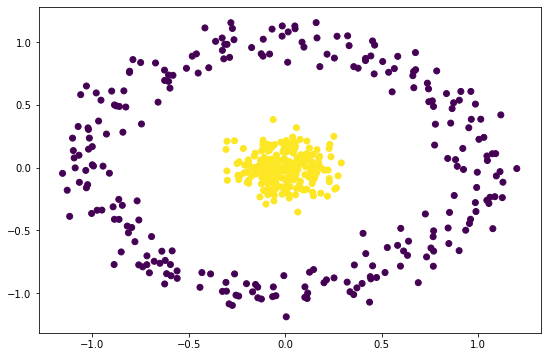

In [6]:
X, y = make_circles(500, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Розбиття датасету та скейл даних

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.5)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test  = scaler.transform(X_test)

#### Навчальна вибірка

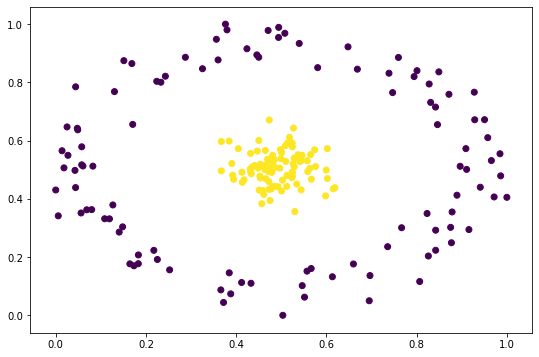

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

#### Тестова вибірка

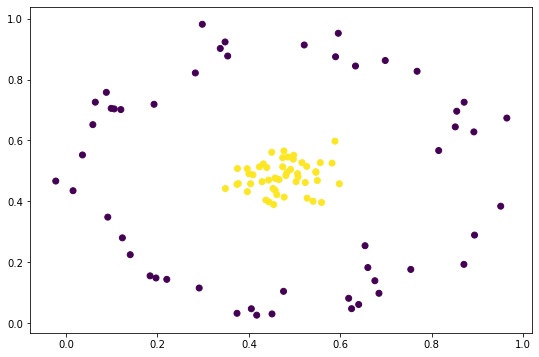

In [9]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

#### Валідаційна вибірка

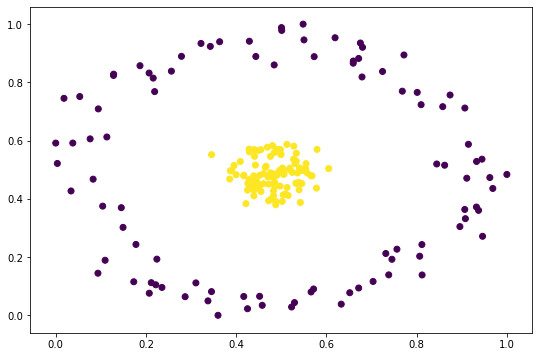

In [10]:
plt.scatter(X_valid[:, 0], X_valid[:, 1], c=y_valid)

### Побудова моделей MLPClassifier
MLPClassifier — багатошаровий персептрон-класифікатор. Ця модель оптимізує лог-функцію втрат за допомогою LBFGS чи SGD.    
У даній роботі розглядається SGD алгоритм. Взагалі MLPClassifier підтримує три методу оптимізації ваг:
- lbfgs — оптимізатор з квазіньютонівських методів;
- sgd — стохастичний градієнтний спуск;
- adam — оптимізатор оснований на стохастичному градієнтному спуску.  

Оптимізатор за замовчуванням «adam» досить добре працює на відносно великих наборах даних (з тисячами навчальних вибірок або більше) з точки зору часу навчання та оцінки перевірки. Однак для невеликих наборів даних «lbfgs» може збігатися швидше і працювати краще.

У роботі досліджується ступінь швидкості навчання для оновлення ваги (learning_rate).
- constant — це постійна швидкість навчання, задана параметром learning_rate_init;
 
- invscaling поступово зменшує швидкість навчання на кожному кроці часу t, використовуючи експонент зворотного масштабування power_t;

- адаптивний підтримує швидкість навчання постійною до learning_rate_init, доки втрата навчання продовжує зменшуватися. Кожного разу, коли дві послідовні епохи не знижують втрати при навчанні щонайменше на tol або не підвищують оцінку перевірки принаймні на tol, якщо ввімкнено early_stopping, поточна швидкість навчання ділиться на 5.  

Параметр warm_start відповідає використання попередніх результатів навчання. Якщо встановлено значення True, то модель повторно використовує рішення попереднього виклику, інакше попередні результати видаляються.  

Параметр early_stopping відповідає за припинення навчання, якщо оцінка перевірки не покращується.

#### MLPClassifier with learning_rate='constant'

In [11]:
clf_constant = MLPClassifier(learning_rate='constant', solver='sgd', warm_start=True, early_stopping=True)
clf_constant.fit(X_train, y_train)

MLPClassifier(early_stopping=True, solver='sgd', warm_start=True)

Confusion matrix:
 [[105   0]
 [ 95   0]]

Accuracy score: 0.525
Mean accuracy score: 0.525
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0

Average expected loss: 0.5
Average bias: 0.5
Average variance: 0.0



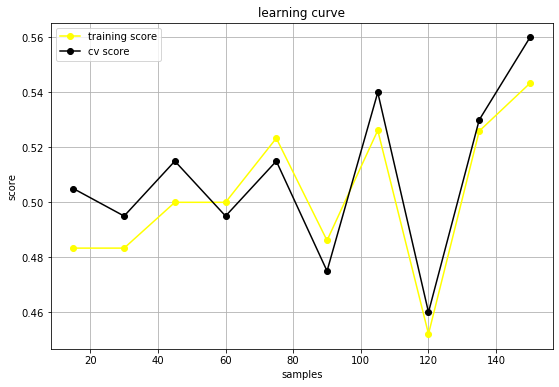

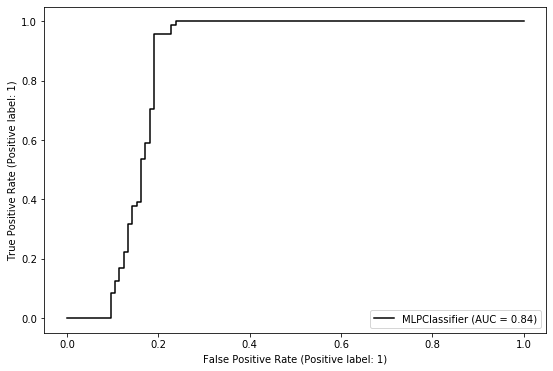

In [12]:
metricsAnalyzer(clf_constant, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[50  0]
 [50  0]]

Accuracy score: 0.5
Mean accuracy score: 0.5
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0

Average expected loss: 0.5
Average bias: 0.5
Average variance: 0.0



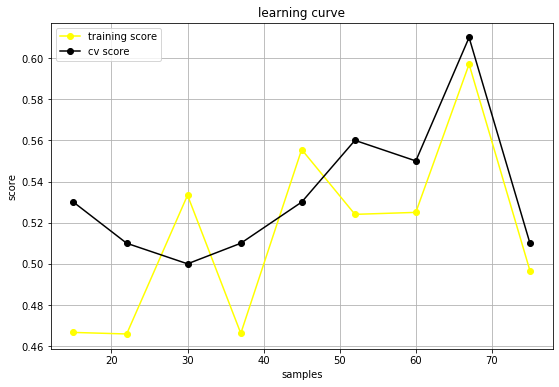

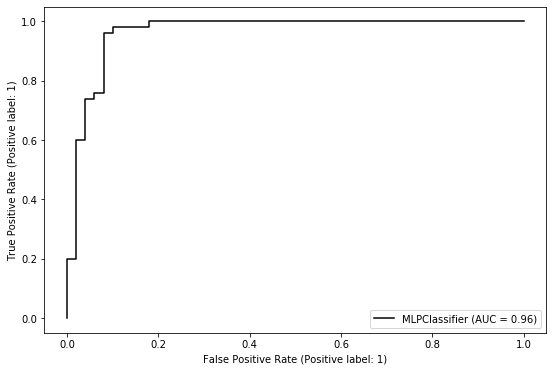

In [13]:
metricsAnalyzer(clf_constant, X_test, y_test, X_test, y_test)

In [14]:
clf_constant.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [15]:
clf_constant.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

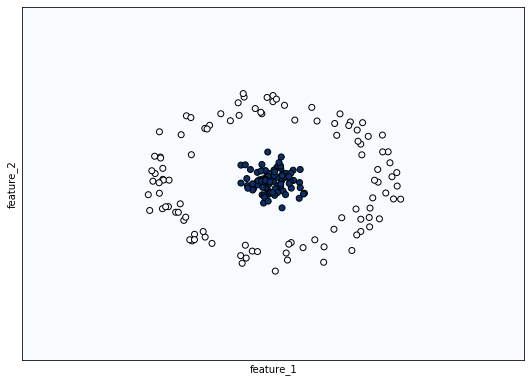

In [16]:
decisionBoundaries(clf_constant, X_train, y_train)

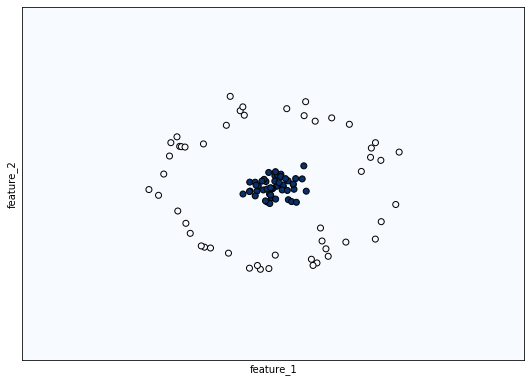

In [17]:
decisionBoundaries(clf_constant, X_test, y_test)

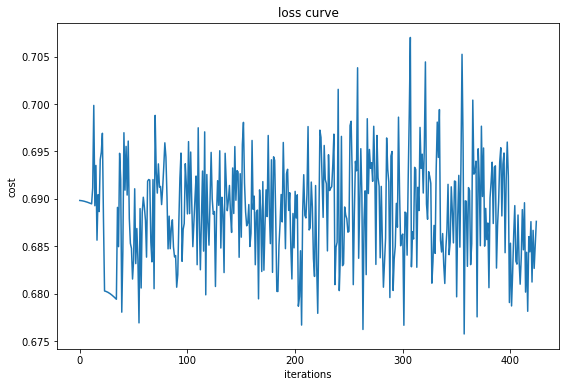

In [18]:
lossCurve(clf_constant)

#### MLPClassifier with learning_rate='invscaling'

In [19]:
clf_invscaling = MLPClassifier(learning_rate='invscaling', solver='sgd', warm_start=True, early_stopping=True)
clf_invscaling.fit(X_train, y_train)

MLPClassifier(early_stopping=True, learning_rate='invscaling', solver='sgd',
              warm_start=True)

Confusion matrix:
 [[74 31]
 [95  0]]

Accuracy score: 0.37
Mean accuracy score: 0.37
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0

Average expected loss: 0.5609500000000001
Average bias: 0.56
Average variance: 0.01645



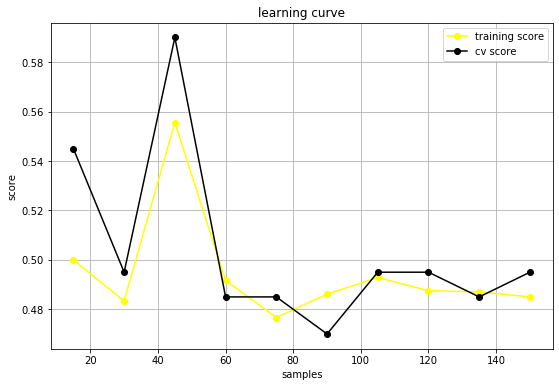

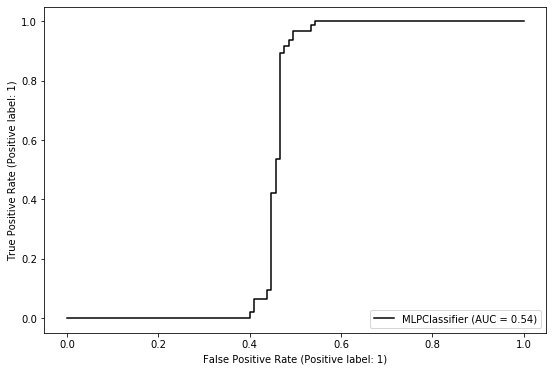

In [20]:
metricsAnalyzer(clf_invscaling, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[46  4]
 [50  0]]

Accuracy score: 0.46
Mean accuracy score: 0.46
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0

Average expected loss: 0.61545
Average bias: 0.62
Average variance: 0.043449999999999996



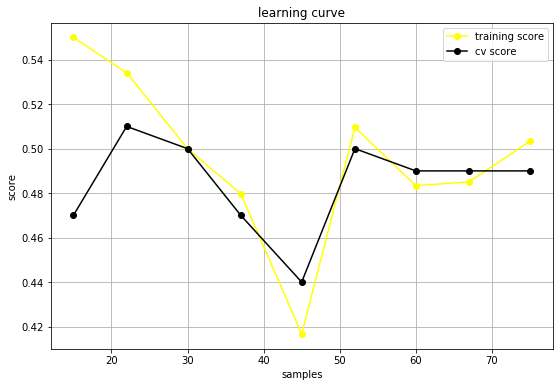

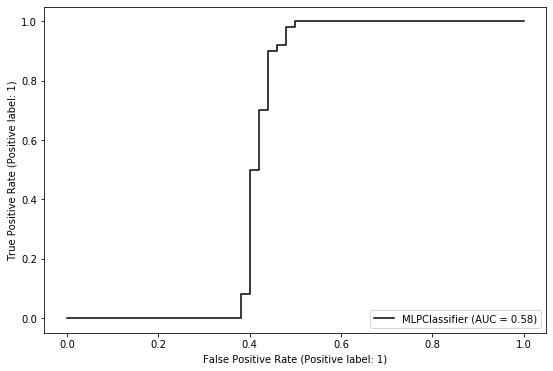

In [21]:
metricsAnalyzer(clf_invscaling, X_test, y_test, X_test, y_test)

In [22]:
clf_invscaling.predict(X_train)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [23]:
clf_invscaling.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

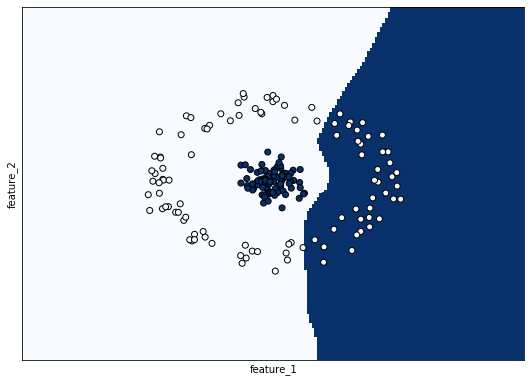

In [24]:
decisionBoundaries(clf_invscaling, X_train, y_train)

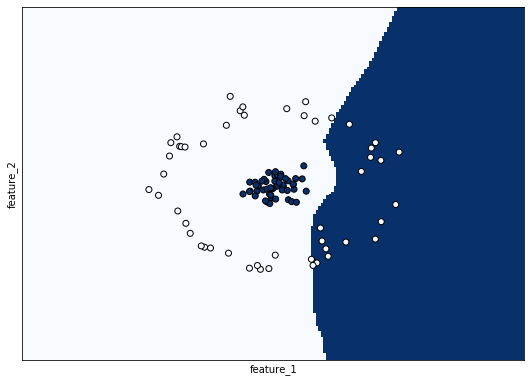

In [25]:
decisionBoundaries(clf_invscaling, X_test, y_test)

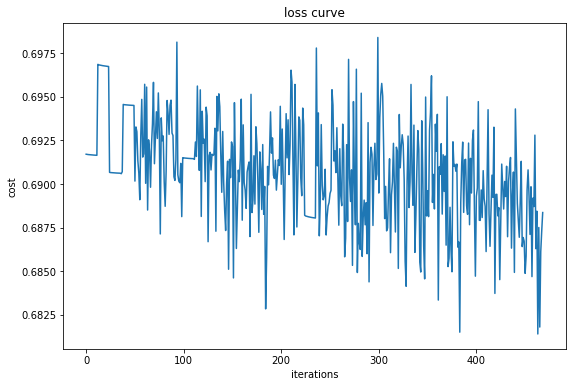

In [26]:
lossCurve(clf_invscaling)

#### MLPClassifier with learning_rate='adaptive'

In [27]:
clf_adaptive = MLPClassifier(learning_rate='adaptive', solver='sgd', warm_start=True, early_stopping=True)
clf_adaptive.fit(X_train, y_train)

MLPClassifier(early_stopping=True, learning_rate='adaptive', solver='sgd',
              warm_start=True)

Confusion matrix:
 [[97  8]
 [95  0]]

Accuracy score: 0.485
Mean accuracy score: 0.485
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0

Average expected loss: 0.50105
Average bias: 0.5
Average variance: 0.0010500000000000002



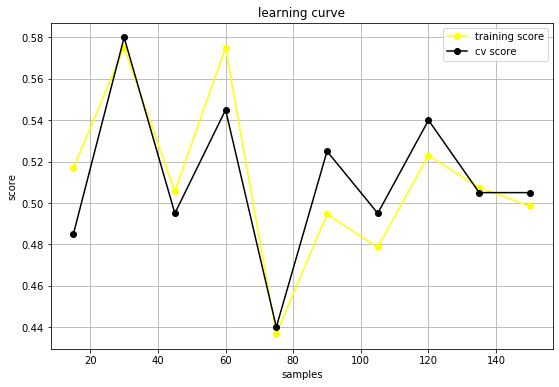

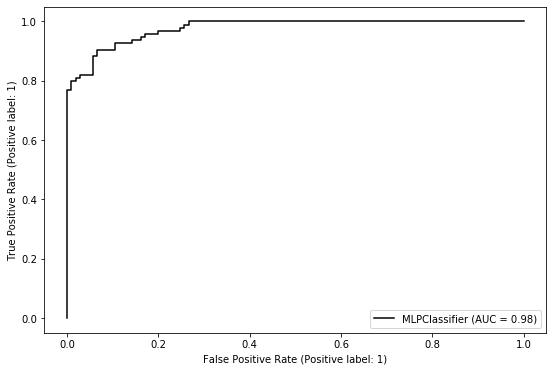

In [28]:
metricsAnalyzer(clf_adaptive, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[50  0]
 [50  0]]

Accuracy score: 0.5
Mean accuracy score: 0.5
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0

Average expected loss: 0.10670000000000002
Average bias: 0.04
Average variance: 0.0917



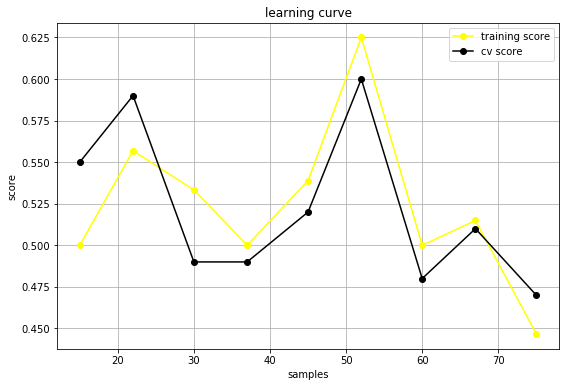

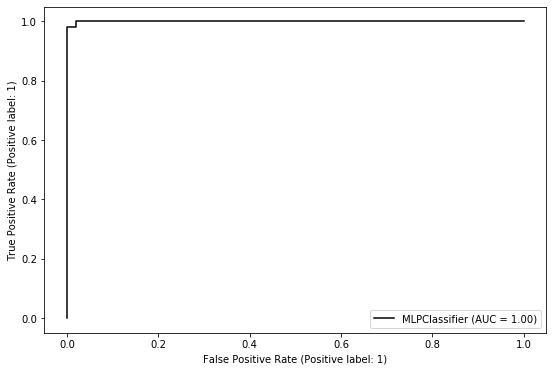

In [29]:
metricsAnalyzer(clf_adaptive, X_test, y_test, X_test, y_test)

In [30]:
clf_adaptive.predict(X_train)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0])

In [31]:
clf_adaptive.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

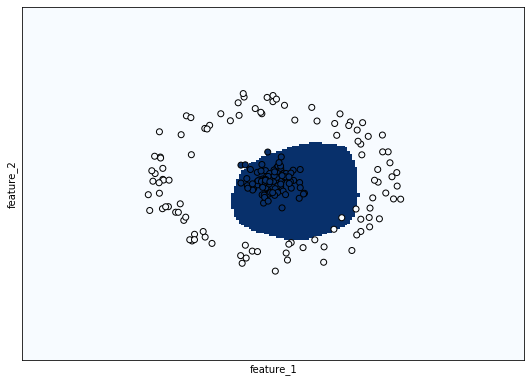

In [32]:
decisionBoundaries(clf_adaptive, X_train, y_train)

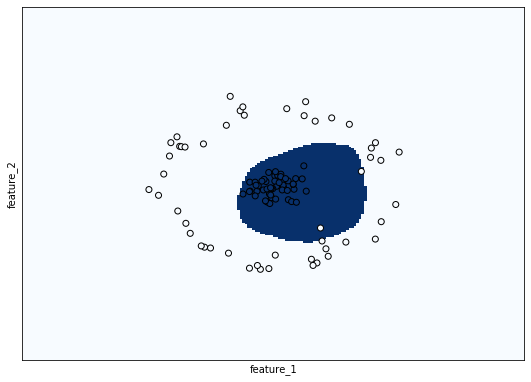

In [33]:
decisionBoundaries(clf_adaptive, X_test, y_test)

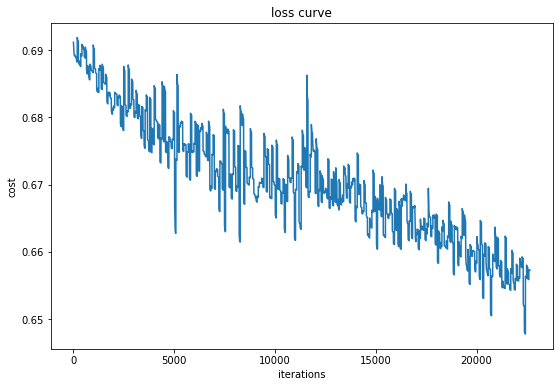

In [34]:
lossCurve(clf_adaptive)

### Решітчастий пошук параметрів

In [35]:
def gridSearchLR(estimator):
    param_grid = {"learning_rate": ["constant", "invscaling", "adaptive"]}
    searcher = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring="f1", cv=10).fit(X_valid, y_valid)
    return searcher.best_params_


In [36]:
#gridSearch(MLPClassifier(early_stopping=True, warm_start=True))

In [37]:
def gridSearchMLP(estimator):
    param_grid = { 'hidden_layer_sizes': [(50,),(100,),(300,)], 
                  'alpha' : [0.01, 0.1, 0.9],
                  'solver' :['adam', 'sgd','lbfgs'],
                  'learning_rate' : ['constant', 'invscaling','adaptive'],
                  'activation': ['relu', 'tanh','identity']
                 }

    searcher = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring="f1", cv=10).fit(X_valid, y_valid)
    return searcher.best_params_


In [38]:
#gridSearchMLP(MLPClassifier(early_stopping=True, warm_start=True))

### Побудова найкращої моделі на основі решітчастого пошуку

Було додано деякі інші параметри, щоб побудувати найкращу модель.

In [39]:
clf_best = MLPClassifier(early_stopping=True, 
                         warm_start=True, 
                         activation = 'relu', 
                         alpha = 0.01, 
                         hidden_layer_sizes =50,
                         learning_rate = 'constant',
                         solver =  'lbfgs')

clf_best.fit(X_train, y_train)

MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=50,
              solver='lbfgs', warm_start=True)

Confusion matrix:
 [[105   0]
 [  0  95]]

Accuracy score: 1.0
Mean accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0

Average expected loss: 0.0
Average bias: 0.0
Average variance: 0.0



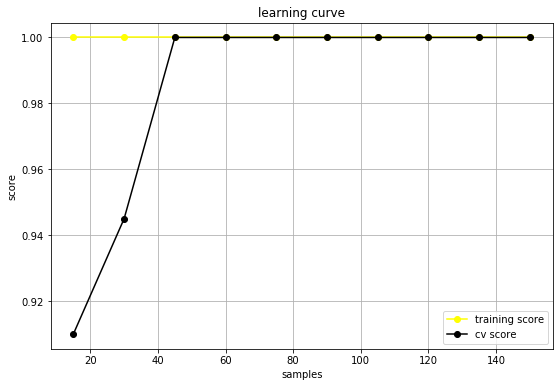

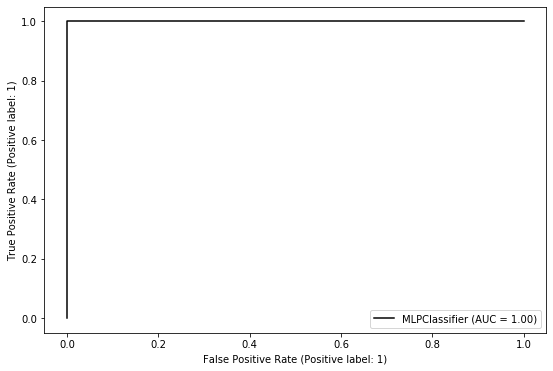

In [40]:
metricsAnalyzer(clf_best, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[50  0]
 [ 0 50]]

Accuracy score: 1.0
Mean accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0

Average expected loss: 5e-05
Average bias: 0.0
Average variance: 5e-05



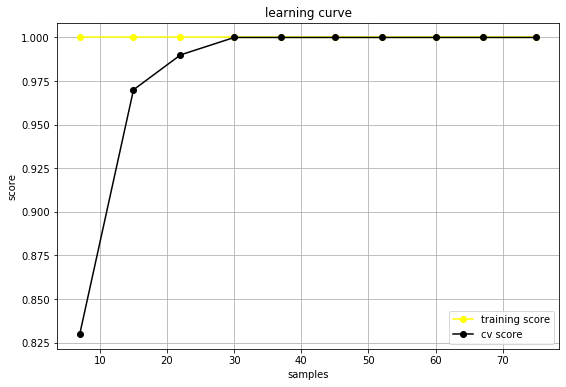

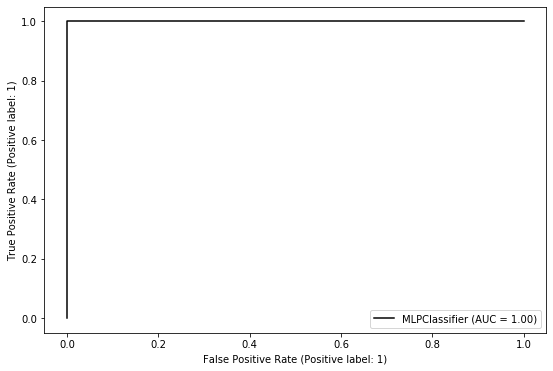

In [41]:
metricsAnalyzer(clf_best, X_test, y_test, X_test, y_test)

In [42]:
clf_best.predict(X_train)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0])

In [43]:
clf_best.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

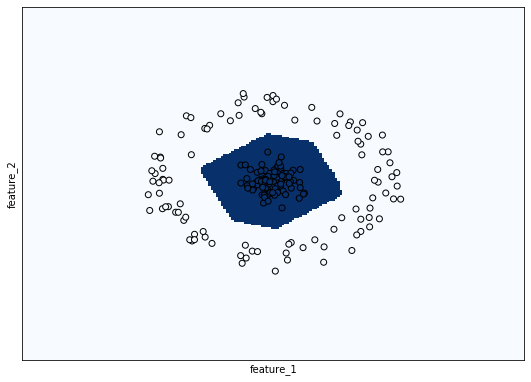

In [44]:
decisionBoundaries(clf_best, X_train, y_train)

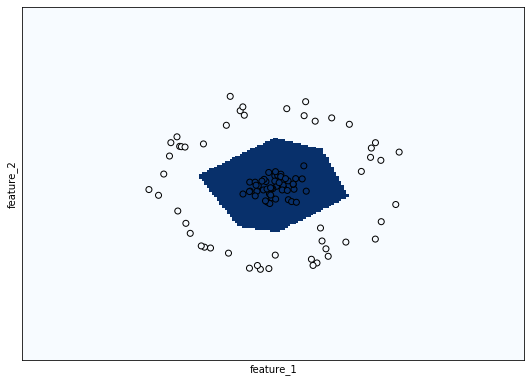

In [45]:
decisionBoundaries(clf_best, X_test, y_test)

### Ансамбль BaggingClassifier

Це комплексний метаоцінювач, який навчає базовий класифікатор на випадкових підмножинах вихідного набору даних, а потім об’єднує їх в індивідуальні прогнози (або шляхом голосування, або шляхом усереднення) для формування остаточного прогнозу. Таку метаоцінку зазвичай можна використовувати як спосіб зменшити дисперсію оцінювача (наприклад, дерева рішень), вводячи рандомізацію в його процедуру побудови, а потім створюючи з неї ансамбль.   

Параметр max_samples відповідає за кількість значень вибірки, які потрібно взяти з X для навчання кожного базового оцінювача (із заміною за замовчуванням).  
Параметр bootstrap відповідає за те, чи відбираються зразки із заміною.  
Параметр n_estimators відповідає за кількість базових оцінювачів в ансамблі. 

In [46]:
clf_bagging_true = BaggingClassifier(max_samples=2, bootstrap=True)
clf_bagging_true.fit(X_train, y_train)

BaggingClassifier(max_samples=2)

Confusion matrix:
 [[55 50]
 [ 0 95]]

Accuracy score: 0.75
Mean accuracy score: 0.75
Precision score: 0.6551724137931034
Recall score: 1.0
F1 score: 0.7916666666666666

Average expected loss: 0.33494999999999997
Average bias: 0.14
Average variance: 0.32565



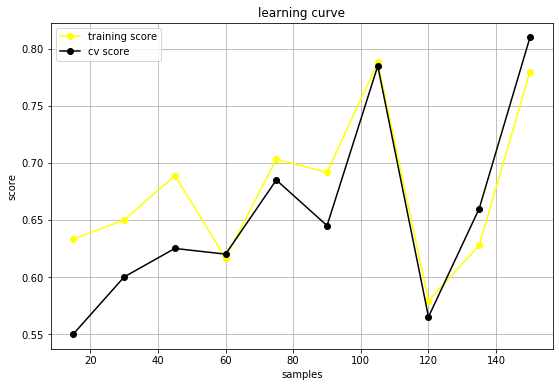

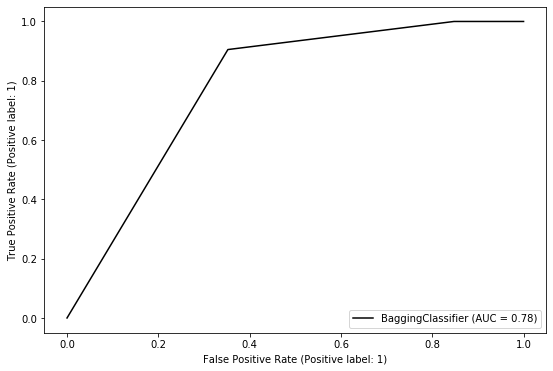

In [47]:
metricsAnalyzer(clf_bagging_true, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[50  0]
 [50  0]]

Accuracy score: 0.5
Mean accuracy score: 0.5
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0

Average expected loss: 0.32295
Average bias: 0.27
Average variance: 0.26735000000000003



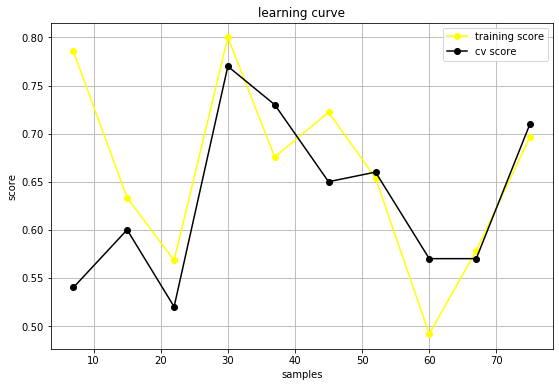

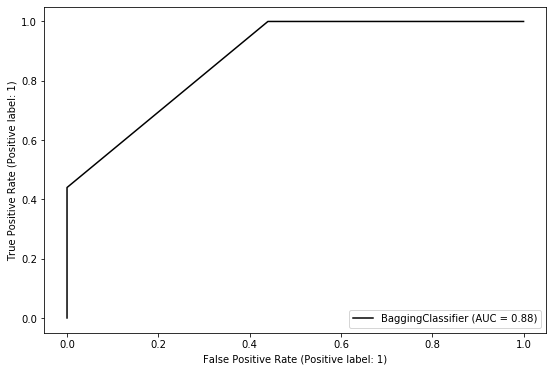

In [48]:
metricsAnalyzer(clf_bagging_true, X_test, y_test, X_test, y_test)

In [49]:
clf_bagging_true.predict(X_train)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [50]:
clf_bagging_true.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

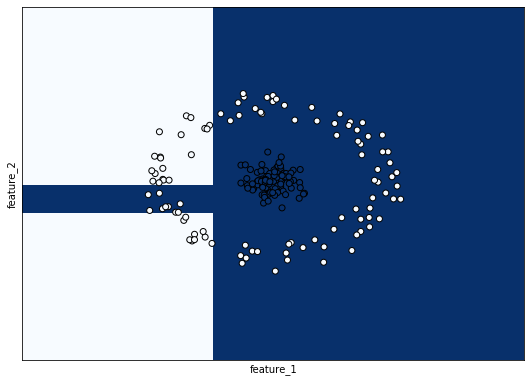

In [51]:
decisionBoundaries(clf_bagging_true, X_train, y_train)

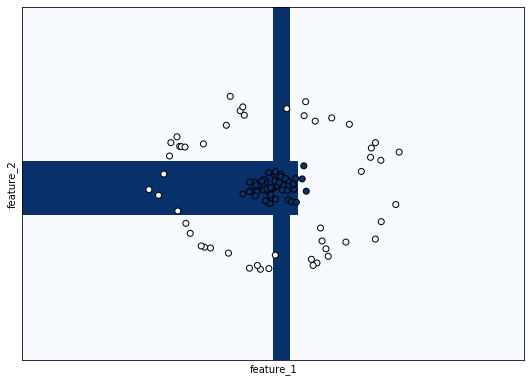

In [52]:
decisionBoundaries(clf_bagging_true, X_test, y_test)

In [53]:
clf_bagging_false = BaggingClassifier(max_samples=12, bootstrap=False)
clf_bagging_false.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, max_samples=12)

Confusion matrix:
 [[96  9]
 [ 2 93]]

Accuracy score: 0.945
Mean accuracy score: 0.945
Precision score: 0.9117647058823529
Recall score: 0.9789473684210527
F1 score: 0.9441624365482234

Average expected loss: 0.05415000000000001
Average bias: 0.0
Average variance: 0.05415000000000001



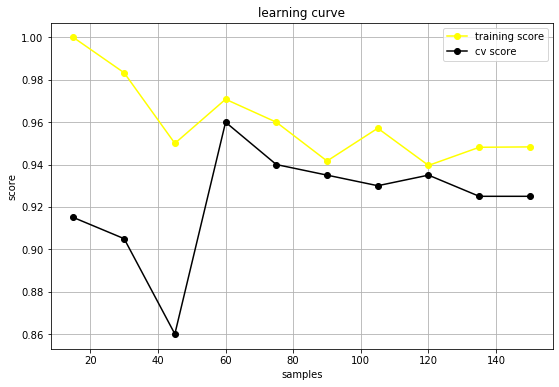

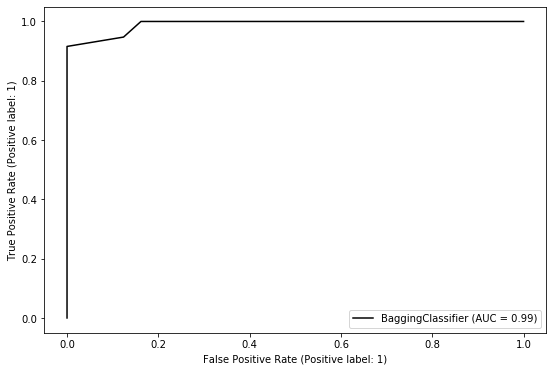

In [54]:
metricsAnalyzer(clf_bagging_false, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[47  3]
 [ 1 49]]

Accuracy score: 0.96
Mean accuracy score: 0.96
Precision score: 0.9423076923076923
Recall score: 0.98
F1 score: 0.9607843137254902

Average expected loss: 0.0479
Average bias: 0.0
Average variance: 0.04789999999999999



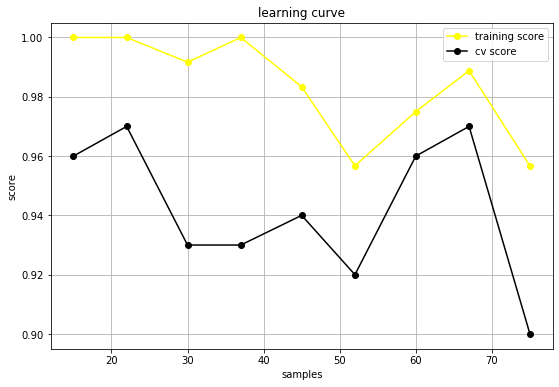

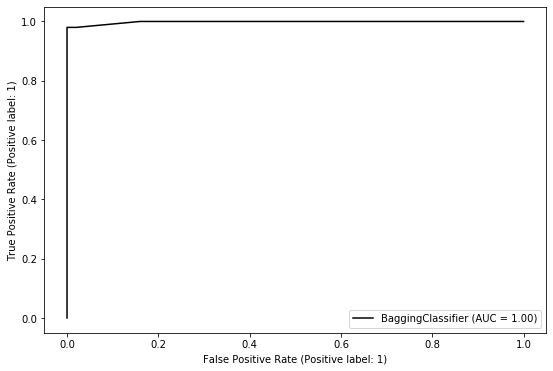

In [55]:
metricsAnalyzer(clf_bagging_false, X_test, y_test, X_test, y_test)

In [56]:
clf_bagging_false.predict(X_train)

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0])

In [57]:
clf_bagging_false.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

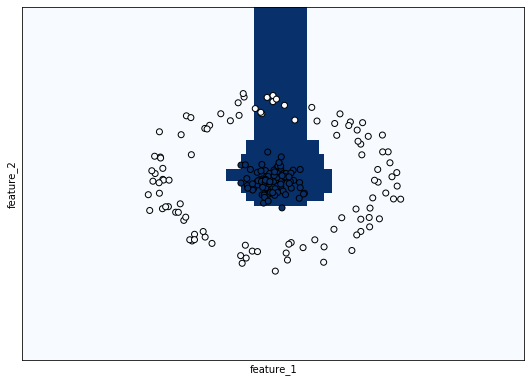

In [58]:
decisionBoundaries(clf_bagging_false, X_train, y_train)

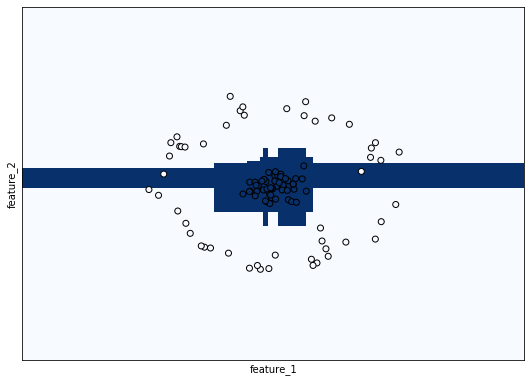

In [59]:
decisionBoundaries(clf_bagging_false, X_test, y_test)

### Решітчастий пошук параметрів та побудова найкращої моделі

In [60]:
def gridSearchBC(estimator):
    param_grid = {"max_samples" : np.arange(100),
                  "bootstrap" : [True, False]}
    searcher = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring="f1", cv=10).fit(X_valid, y_valid)
    return searcher.best_params_

In [61]:
#gridSearchBC(BaggingClassifier())

In [62]:
clf_bagging_best = BaggingClassifier(max_samples=49, bootstrap=True, oob_score=True)
clf_bagging_best.fit(X_train, y_train)

BaggingClassifier(max_samples=49, oob_score=True)

Confusion matrix:
 [[105   0]
 [  0  95]]

Accuracy score: 1.0
Mean accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0

Average expected loss: 0.02035
Average bias: 0.0
Average variance: 0.02035



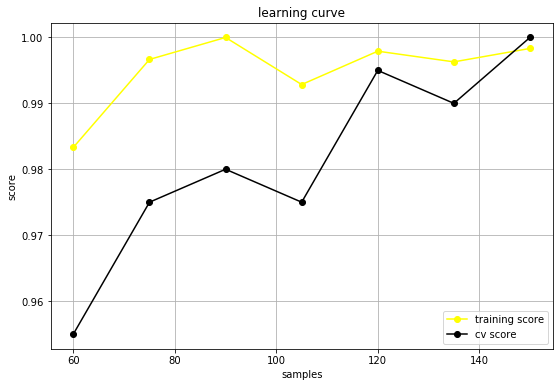

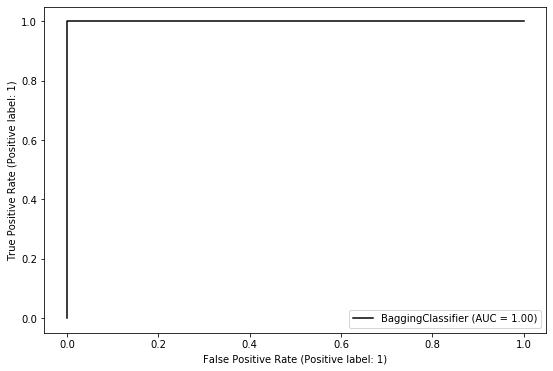

In [63]:
metricsAnalyzer(clf_bagging_best, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[50  0]
 [ 0 50]]

Accuracy score: 1.0
Mean accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0

Average expected loss: 0.0228
Average bias: 0.0
Average variance: 0.0228



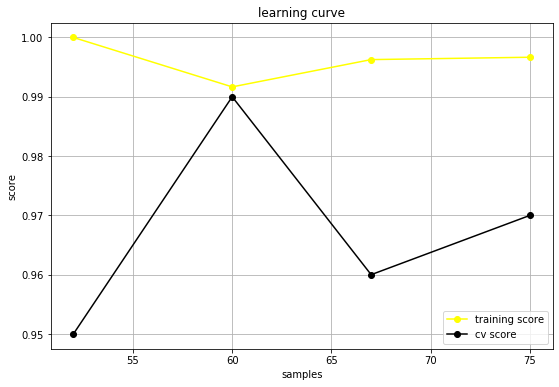

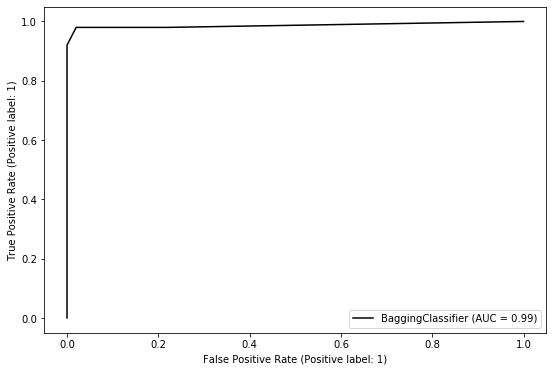

In [64]:
metricsAnalyzer(clf_bagging_best, X_test, y_test, X_test, y_test)

In [65]:
clf_bagging_best.predict(X_train)

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0])

In [66]:
clf_bagging_best.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

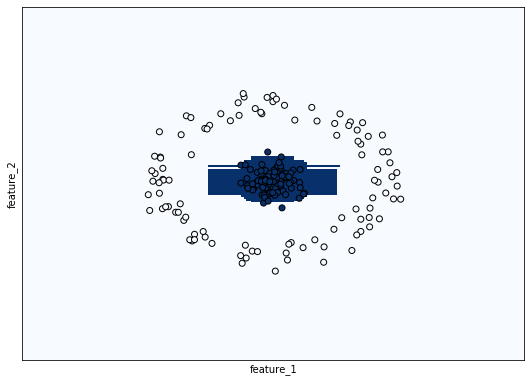

In [67]:
decisionBoundaries(clf_bagging_best, X_train, y_train)

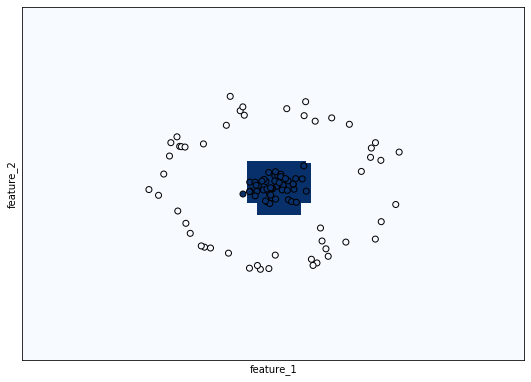

In [68]:
decisionBoundaries(clf_bagging_best, X_test, y_test)

### Ансамбль  ExtraTreesClassifier
Цей клас реалізує метаоцінювач, який відповідає низці рандомізованих дерев рішень на різних підвибірках набору даних і використовує усереднення для покращення точності прогнозування та контролю перенавчання.

Параметр max_depth відповідає за максимальну глибину дерева.  
Параметр max_features відповідає за кількість ознак, які слід враховувати при пошуку найкращого розбиття.  
Параметр min_samples_split відповідає за мінімальну кількість самплів, необхідних для розділення внутрішнього вузла.

In [69]:
clf_default_etree = ExtraTreesClassifier()
clf_default_etree.fit(X_train, y_train)

ExtraTreesClassifier()

Confusion matrix:
 [[105   0]
 [  0  95]]

Accuracy score: 1.0
Mean accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0

Average expected loss: 0.0
Average bias: 0.0
Average variance: 0.0



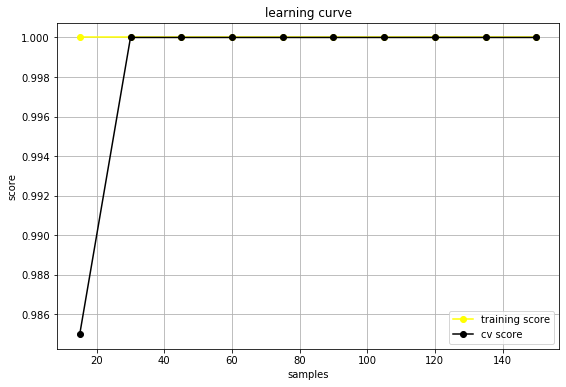

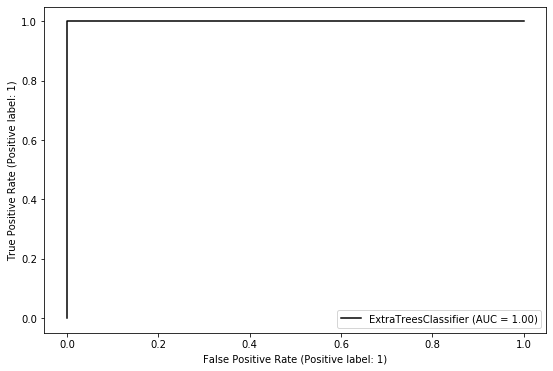

In [70]:
metricsAnalyzer(clf_default_etree, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[105   0]
 [  0  95]]

Accuracy score: 1.0
Mean accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0

Average expected loss: 0.0
Average bias: 0.0
Average variance: 0.0



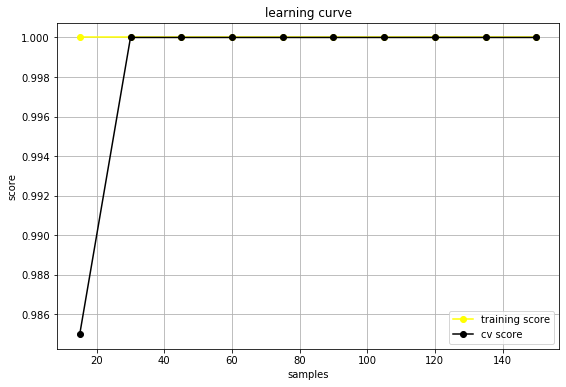

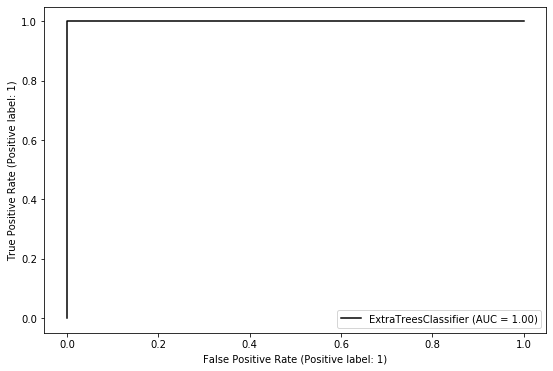

In [71]:
metricsAnalyzer(clf_default_etree, X_train, y_train, X_test, y_test)

In [72]:
clf_default_etree.predict(X_train)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0])

In [73]:
clf_default_etree.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

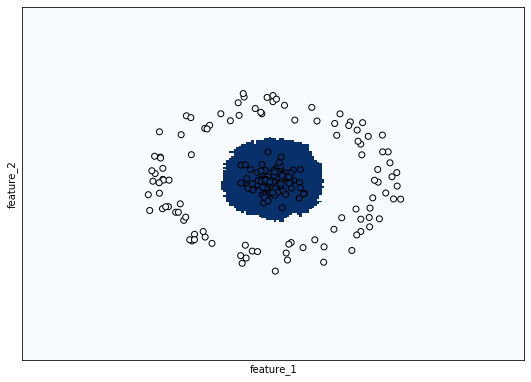

In [74]:
decisionBoundaries(clf_default_etree, X_train, y_train)

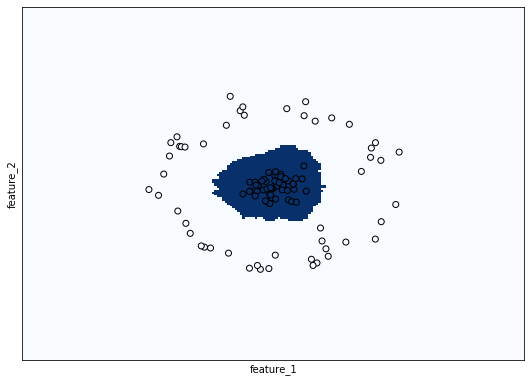

In [75]:
decisionBoundaries(clf_default_etree, X_test, y_test)

### Решітчастий пошук та побудова найкращої моделі

In [76]:
def gridSearchETC(estimator):
    param_grid = {"max_depth" : [1, 2, 5, 10, 15],
                  "max_features" : [1, 2, 5, 10, 15],
                  "min_samples_split" : [1, 2, 5, 10, 15]}
    searcher = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring="f1", cv=10).fit(X_valid, y_valid)
    return searcher.best_params_

In [77]:
#gridSearchETC(ExtraTreesClassifier())

In [78]:
clf_best_etree = ExtraTreesClassifier(max_depth=2, max_features=1, min_samples_split=2, bootstrap=True, oob_score=True)
clf_best_etree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_depth=2, max_features=1,
                     oob_score=True)

Confusion matrix:
 [[105   0]
 [  0  95]]

Accuracy score: 1.0
Mean accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0

Average expected loss: 0.0025
Average bias: 0.0
Average variance: 0.0025



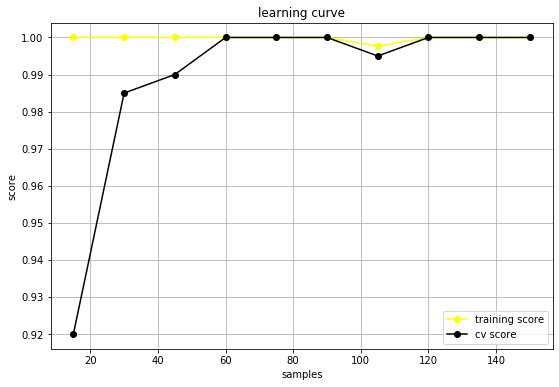

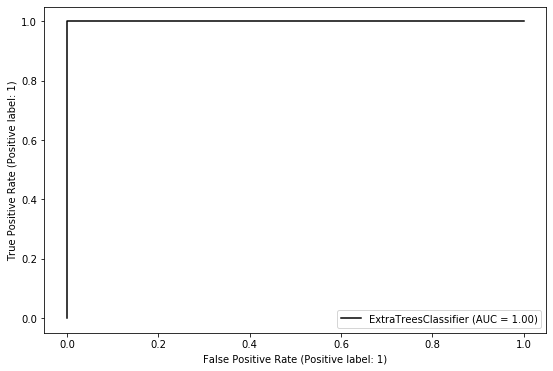

In [79]:
metricsAnalyzer(clf_best_etree, X_train, y_train, X_test, y_test)

Confusion matrix:
 [[50  0]
 [ 0 50]]

Accuracy score: 1.0
Mean accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0

Average expected loss: 0.0045000000000000005
Average bias: 0.0
Average variance: 0.0045



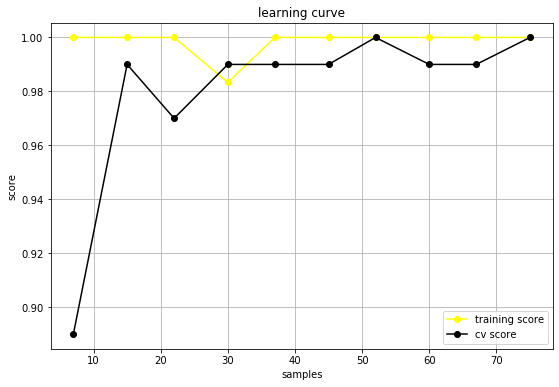

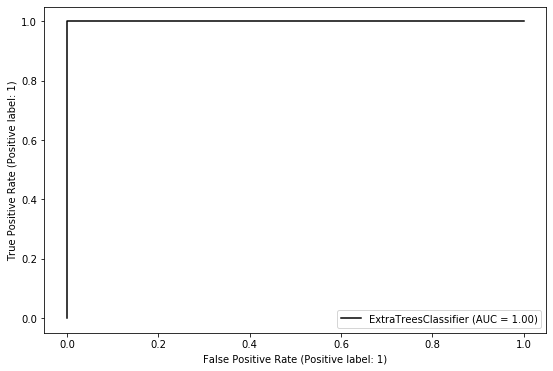

In [80]:
metricsAnalyzer(clf_best_etree, X_test, y_test, X_test, y_test)

In [81]:
clf_best_etree.predict(X_train)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0])

In [82]:
clf_best_etree.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

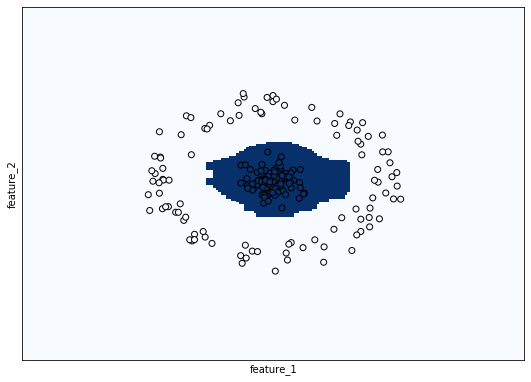

In [83]:
decisionBoundaries(clf_best_etree, X_train, y_train)

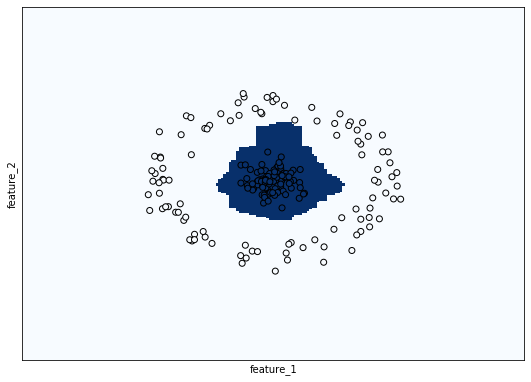

In [84]:
decisionBoundaries(clf_best_etree, X_train, y_train)

### Криві залежності точності від кількості вирішувачів

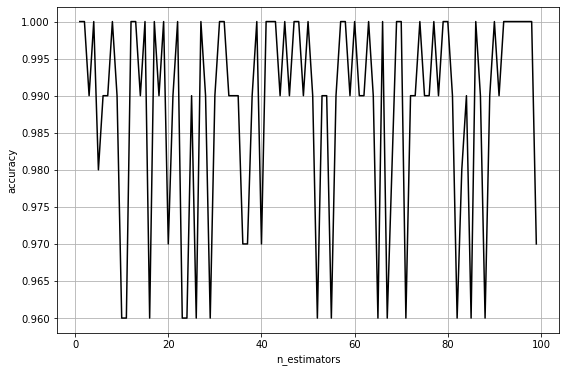

In [85]:
accuracyEstimatorCurve(clf_bagging_best, 100, X_train, y_train, X_test, y_test)

In [86]:
clf_bagging_best.oob_score_

0.975

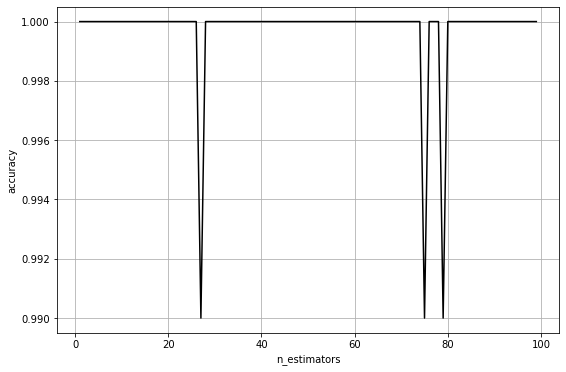

In [87]:
accuracyEstimatorCurve(clf_best_etree, 100, X_train, y_train, X_test, y_test)

In [88]:
clf_best_etree.oob_score_

0.995

### Аналіз часу навчання ансамблю та окремої моделі

In [89]:
%%time
BaggingClassifier(n_estimators=100).fit(X_train, y_train)

CPU times: user 246 ms, sys: 3.9 ms, total: 250 ms
Wall time: 264 ms


BaggingClassifier(n_estimators=100)

In [90]:
%%time
DecisionTreeClassifier().fit(X_train, y_train)

CPU times: user 2.19 ms, sys: 18 µs, total: 2.2 ms
Wall time: 2.2 ms


DecisionTreeClassifier()

###  Висновки

Було побудовано декілька моделей MLPCLassifier, різні ансамблі BaggingClassifier та ExtraTreesClassifier. Серед них знайдено найкращі моделі за допомогою підбору гіперпараметрів, усі найкращі моделі видають ідеальний (або майже ідеальний) результат класифікації, це було оцінено за допомогою великої кількості метрик. Було побудовано різні графіки для кожної моделі: крива навчання, ROC-крива та графіки залежності точності від вирішувачів для ансамблів.  

---

Час навчання ансамблю значно перевищує час навчання окремої моделі, приблизно у сто разів.